In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage.
from sklearn.cluster import KMeans

# Import foloum.
import folium # map rendering library

# Import Beautiful Soup.
from bs4 import BeautifulSoup

In [9]:
# Load the robbery in a financial institution (RFI) of Toronto (2014-2019).
linkcrime = "D:\pyproject\jupyter\Practice\CS9\mci-rfi.csv"

In [10]:
# Make a dataframe of RFI.
torcrime_df = pd.read_csv(linkcrime)
torcrime_df.head(20)

,Category,Long,Lat
0,RFI,-79.382118,43.659100
1,RFI,-79.415573,43.779770
2,RFI,-79.393005,43.640564
3,RFI,-79.323639,43.683369
4,RFI,-79.376198,43.650143
5,RFI,-79.393356,43.791130
6,RFI,-79.429977,43.720036
7,RFI,-79.349625,43.678013
8,RFI,-79.396957,43.699791
9,RFI,-79.396957,43.699791


In [11]:
# Create a RFI map of Toronoto using latitude and longitude values.
crime_map_toronto = folium.Map(location = [43.653908, -79.384293], zoom_start = 10)

# Add markers to map.
for MCI, Long, Lat in zip(torcrime_df['Category'], torcrime_df['Long'], torcrime_df['Lat']):
    label = '{}'.format('Category')
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [Lat, Long],
        radius = 3,
        popup = label,
        color ='blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(crime_map_toronto)  
    
crime_map_toronto

In [12]:
torcrime_clustering = torcrime_df.drop('Category', 1)

In [13]:
SSE = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(torcrime_clustering)
    SSE.append(kmeanModel.inertia_)

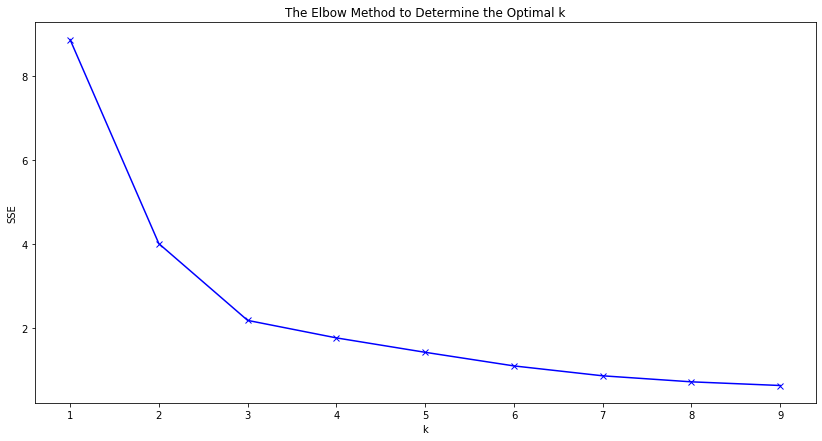

In [14]:
plt.figure(figsize = (14, 7))
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to Determine the Optimal k')
plt.show()

In [15]:
# Set thenumber of clusters.
kclusters = 3

# Run k-means clustering.
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(torcrime_clustering)

In [16]:
torcrime_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
torcrime_clustering.head()

,Cluster Labels,Long,Lat
0,2,-79.382118,43.659100
1,2,-79.415573,43.779770
2,2,-79.393005,43.640564
3,2,-79.323639,43.683369
4,2,-79.376198,43.650143


In [17]:
# Create a map.
crime_map_clusters = folium.Map(location=[43.653908, -79.384293], zoom_start = 10)

# Set color scheme for the clusters.
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map.
markers_colors = []
for lat, lon, cluster in zip(torcrime_clustering['Lat'], torcrime_clustering['Long'], torcrime_clustering['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 3,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(crime_map_clusters)
       
crime_map_clusters